# Final Project Submission

* Student Name: Gustavo Chavez 

* Student Pace: Full time

* Instructor Name: Abhineet Kulkarni

# Data Preprocessing

In this notebook I will clean and scrub my data, as well as deal with any missing values and remove redundant columns. The data we are working with is part of a competition hosted by DrivenData.org, and has been gathered by Taarifa.

In [1]:
import numpy as np
import pandas as pd
import os
from Phase03functions import *

In [2]:
#Check Current Directory
os.getcwd()

'C:\\Users\\Gustavo\\flatiron\\class-material\\section03\\Phase03Project\\Notebooks'

In [3]:
#Import our data
#These lines will need to be adjust depending on what the current directory is
trainingvalues = pd.read_csv("../Data/trainingsetvalues.csv")
traininglabels = pd.read_csv("../Data/trainingsetlabels.csv")

#Merge values and labels together on id
trainingdata = pd.merge(trainingvalues, traininglabels, on='id', how='outer')

In [4]:
#Display all columns so that we may view all features
pd.set_option('display.max_columns', None)

In [5]:
display(trainingdata.head(20))
display(trainingdata.info())
display(trainingdata.describe())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

None

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## Dealing with Duplicate and NAN values

In [6]:
#'id' should be a unique column within the dataset
print(trainingdata.duplicated().sum())

0


### There were no duplicates in dataset, now to deal will NAN values.

I will approach dealing with the missing values, and certain other values as well. When looking at construction year, we have some 0 year values, which obviously should not be so. I will turn them into NaN so that they may show up.

In [7]:
#Replaces all 0 year construction years in our dataset with nan
trainingdata['construction_year'].replace({0: np.nan}, inplace= True)

In [8]:
trainingdata.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
trainingdata.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009.0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,NaN,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,NaN,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well

In [10]:
#Funder and Installer appear to be the same in a lot of different categories.
#It is safe to assume that in most cases, the funder is also the installer

#Fills the nan value with the non-nan value if present in that row.
trainingdata['funder'].fillna(trainingdata['installer'], inplace= True)
trainingdata['installer'].fillna(trainingdata['funder'], inplace= True)

In [11]:
trainingdata[['funder', 'installer']].isna().sum()

funder       3582
installer    3582
dtype: int64

In [12]:
#Will fill in certain column nans with 'unknown'
#Columns I am targeting
columns_for_unknown_fill = ['funder','installer','subvillage','scheme_management','scheme_name']

#For loop will fill through certain columns 'unknown'
for column in columns_for_unknown_fill:
    trainingdata[column].fillna('unknown', inplace= True)

Since 'construction_year' is a continuous variable, and since both 'permit' and 'public_meeting' are boolean, I would like to deal with them using a different approach. For these columns, I will be using an Iterative Imputer to assign new values to them.

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [14]:
#IterativeImputer only works for integer/float 
#values so we will convert permit and public meeting as such
trainingdata['permit'].replace({True:1, False:0}, inplace=True)
trainingdata['public_meeting'].replace({True:1, False:0}, inplace=True)
trainingdata['permit'].unique()

array([ 0.,  1., nan])

In [15]:
#Check value counts before imputation
print(trainingdata['permit'].value_counts(normalize=True), '\n')
print(trainingdata['public_meeting'].value_counts(normalize=True))

1.0    0.68955
0.0    0.31045
Name: permit, dtype: float64 

1.0    0.909838
0.0    0.090162
Name: public_meeting, dtype: float64


In [16]:
#These are all the numerical columns within our dataset
columns_for_imputation = ['amount_tsh', 'longitude','latitude','gps_height','population',\
                   'public_meeting','permit']

#Set the min and max value to be 0 and 1, respectively, to match what is in permit and public meeting
iterimputer = IterativeImputer(estimator=BayesianRidge(), min_value =0, max_value =1)

#Our permit and public_meeting values. we round so that they aren't floats
permit_vals = np.round(iterimputer.fit_transform(trainingdata[columns_for_imputation])[:,-1], 0)
pub_meet_vals = np.round(iterimputer.fit_transform(trainingdata[columns_for_imputation])[:,-2], 0)

In [17]:
#We now add construction year to the 
if 'construction_year' not in columns_for_imputation:
    columns_for_imputation.append('construction_year')

#New imputer is initialized, min and max range is adjusted to fit construction year
iterimputer2 = IterativeImputer(estimator=BayesianRidge(), min_value =1960, max_value =2013)

construction_yr_vals = np.round(iterimputer2.fit_transform(trainingdata[columns_for_imputation])[:,-1], 0)

In [18]:
#Places the new values in a matrix and transforms to match dataframe layout
imputed_vals = np.array([permit_vals, pub_meet_vals, construction_yr_vals])
imputed_vals.T.shape

#Places the values in a dataframe
imputed_vals_df = pd.DataFrame( imputed_vals.T ,columns=['permit', 'public_meeting','construction_year'])
display(imputed_vals_df.head())
len(imputed_vals_df)

,permit,public_meeting,construction_year
0,0.0,1.0,1999.0
1,1.0,1.0,2010.0
2,1.0,1.0,2009.0
3,1.0,1.0,1986.0
4,1.0,1.0,1996.0


59400

Since iterative imputer does not change any values that are not NaN, I can simply replace the values in the trainingdataset with the values in the imputed one.

In [19]:
#Replace the null values in the training set with the new values in the imputed df
shared_columns = ['permit','public_meeting','construction_year']
for column in shared_columns:
    trainingdata[column] = imputed_vals_df[column]

In [20]:
trainingdata.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [21]:
#Check value counts after imputation
print(trainingdata['permit'].value_counts(normalize=True), '\n')
print(trainingdata['public_meeting'].value_counts(normalize=True))

1.0    0.705135
0.0    0.294865
Name: permit, dtype: float64 

1.0    0.914899
0.0    0.085101
Name: public_meeting, dtype: float64


Now that the missing data is dealt with I will focus on removing redundant/unneccesary columns.

## Feature Narrowing

In [22]:
#Function created that pulls all object column names and number of unique values in a dataset.
get_object_columns_unique_count(trainingdata)

[{'column': 'wpt_name', 'unique items': 37400},
 {'column': 'subvillage', 'unique items': 19288},
 {'column': 'scheme_name', 'unique items': 2697},
 {'column': 'installer', 'unique items': 2174},
 {'column': 'ward', 'unique items': 2092},
 {'column': 'funder', 'unique items': 1917},
 {'column': 'date_recorded', 'unique items': 356},
 {'column': 'lga', 'unique items': 125},
 {'column': 'region', 'unique items': 21},
 {'column': 'extraction_type', 'unique items': 18},
 {'column': 'scheme_management', 'unique items': 13},
 {'column': 'extraction_type_group', 'unique items': 13},
 {'column': 'management', 'unique items': 12},
 {'column': 'source', 'unique items': 10},
 {'column': 'basin', 'unique items': 9},
 {'column': 'water_quality', 'unique items': 8},
 {'column': 'extraction_type_class', 'unique items': 7},
 {'column': 'payment', 'unique items': 7},
 {'column': 'payment_type', 'unique items': 7},
 {'column': 'source_type', 'unique items': 7},
 {'column': 'waterpoint_type', 'unique ite

In [23]:
#These columns either provide no useful information or are too granular to be used
unnecessary_columns = ['num_private','wpt_name','subvillage','scheme_name','recorded_by']

#IF statement in place to prevent running statement twice and causing error
if unnecessary_columns[0] in trainingdata.columns:
    trainingdata.drop(columns= unnecessary_columns, inplace=True)
else:
    print('Columns already dropped')

In [24]:
#Function that will take in a dataset, and two related columns. It will print the value counts in relation to our target.
#Purpose of this is to see if we gain any substantial information in the more granular column or if we should drop it.
show_status_group_values(trainingdata,'quality_group','water_quality', False)   



 quality_group Column value:  good
Index(['soft'], dtype='object')

soft value of water_quality column
functional                 28760
non functional             18154
functional needs repair     3904
Name: status_group, dtype: int64


 quality_group Column value:  salty
Index(['salty', 'salty abandoned'], dtype='object')

salty value of water_quality column
non functional             2411
functional                 2220
functional needs repair     225
Name: status_group, dtype: int64

salty abandoned value of water_quality column
functional                 174
non functional              93
functional needs repair     72
Name: status_group, dtype: int64


 quality_group Column value:  milky
Index(['milky'], dtype='object')

milky value of water_quality column
functional                 438
non functional             352
functional needs repair     14
Name: status_group, dtype: int64


 quality_group Column value:  unknown
Index(['unknown'], dtype='object')

unknown value of water_q

In [25]:
#Water_quality appears to be unneccesarily granular and will be dropped
redundant_columns = ['water_quality']

In [26]:
show_status_group_values(trainingdata,'waterpoint_type_group','waterpoint_type', False)



 waterpoint_type_group Column value:  communal standpipe
Index(['communal standpipe', 'communal standpipe multiple'], dtype='object')

communal standpipe value of waterpoint_type column
functional                 17726
non functional              8536
functional needs repair     2260
Name: status_group, dtype: int64

communal standpipe multiple value of waterpoint_type column
non functional             3220
functional                 2235
functional needs repair     648
Name: status_group, dtype: int64


 waterpoint_type_group Column value:  hand pump
Index(['hand pump'], dtype='object')

hand pump value of waterpoint_type column
functional                 10805
non functional              5654
functional needs repair     1029
Name: status_group, dtype: int64


 waterpoint_type_group Column value:  other
Index(['other'], dtype='object')

other value of waterpoint_type column
non functional             5247
functional                  840
functional needs repair     293
Name: status_g

In [27]:
if 'waterpoint_type' not in redundant_columns:
    redundant_columns.append('waterpoint_type')

In [28]:
#Quantity_group and quantity have the same information.
#Keeping quantity because column name is shorter
if 'quantity_group' not in redundant_columns:
    redundant_columns.append('quantity_group')

In [29]:
show_status_group_values(trainingdata, 'source_type','source', False)



 source_type Column value:  spring
Index(['spring'], dtype='object')

spring value of source column
functional                 10592
non functional              5153
functional needs repair     1276
Name: status_group, dtype: int64


 source_type Column value:  rainwater harvesting
Index(['rainwater harvesting'], dtype='object')

rainwater harvesting value of source column
functional                 1386
non functional              595
functional needs repair     314
Name: status_group, dtype: int64


 source_type Column value:  dam
Index(['dam'], dtype='object')

dam value of source column
non functional             379
functional                 253
functional needs repair     24
Name: status_group, dtype: int64


 source_type Column value:  borehole
Index(['machine dbh', 'hand dtw'], dtype='object')

machine dbh value of source column
functional                 5422
non functional             5162
functional needs repair     491
Name: status_group, dtype: int64

hand dtw value of 

In [30]:
#Source seems unnecessarily granular, keeping source_type and dropping the others.
if 'source' not in redundant_columns:
    redundant_columns.append('source')
if 'source_class' not in redundant_columns:
    redundant_columns.append('source_class')

In [31]:
#Keeping extraction_type_class because 7 is plenty.
if 'extraction_type' not in redundant_columns:
    redundant_columns.append('extraction_type')
if 'extraction_type_group' not in redundant_columns:
    redundant_columns.append('extraction_type_group')

In [32]:
#Management_group is unbalanced, and keeping management over scheme_management
if "management_group" not in redundant_columns:
    redundant_columns.append('management_group')
if 'scheme_management' not in redundant_columns:
    redundant_columns.append('scheme_management')
    
#payment and payment_type are also redundant
if 'payment' not in redundant_columns:
    redundant_columns.append('payment')

In [33]:
#Drops all the columns we have deemed as redundant
if redundant_columns[-1] in trainingdata.columns:
    trainingdata.drop(columns= redundant_columns, inplace=True)

In [34]:
#There are a lot of geographical columns, we do not need as many.
geo_columns_for_drop = ['region_code','district_code','lga','ward']
#Keeping latitude and longitude because they are continuous
#Keeping region and basin because they are both geographically significant and 
if geo_columns_for_drop[-1] in trainingdata.columns:
    trainingdata.drop(columns= geo_columns_for_drop, inplace= True)

In [35]:
trainingdata.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'region', 'population',
       'public_meeting', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'payment_type', 'quality_group',
       'quantity', 'source_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

## Feature Modification/Binning

Now I will bin funder and installer into a more comfortable number of columns for modeling. 
I also noticed some values for latitude and longitude do not match the proper region and appear to be at 0. I will replace the 0 values with the average latitude and longitude for their region.
I will also create new features from construction_year and date_recorded.

In [36]:
#Function that will make an in place change and create two other categories for the rest of the features within a dataset.
group_into_contribution_size(trainingdata, column = 'funder', name = 'Medium sized funder', name_2= 'Small sized funder')

New unique value set 

 Small sized funder        26992
Government Of Tanzania     9084
Medium sized funder        8113
unknown                    3582
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Name: funder, dtype: int64


In [37]:
group_into_contribution_size(trainingdata, column= 'installer', name= 'Medium sized installer', name_2= 'Small sized installer')

New unique value set 

 Small sized installer     26616
DWE                       17402
Medium sized installer     6658
unknown                    3583
Government                 1825
RWE                        1206
Commu                      1060
DANIDA                     1050
Name: installer, dtype: int64


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array(['Lake Victoria', 'Lake Tanganyika'], dtype=object)

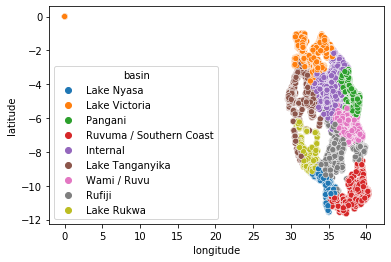

In [39]:
sns.scatterplot(data = trainingdata, x='longitude', y='latitude', hue= 'basin')
#View the basins within the set
trainingdata[trainingdata['longitude'] < 5]['basin'].unique()

In [40]:
#Creates a df that contains all datapoints with accurate lat/long values
lat_long_means = trainingdata[(trainingdata['longitude'] > 5)][['latitude','longitude', 'basin']]\
.groupby(by='basin').agg(['count','mean'])


# Pulling lat and long for the basins that have incorrect info in their lat long column
LV_lat_mean = lat_long_means.loc['Lake Victoria']['latitude']['mean']
LV_long_mean = lat_long_means.loc['Lake Victoria']['longitude']['mean']
LT_lat_mean = lat_long_means.loc['Lake Tanganyika']['latitude']['mean']
LT_long_mean = lat_long_means.loc['Lake Tanganyika']['longitude']['mean']

In [41]:
#Creates a mask for .loc to identify the data that is the problem
LVmask = (trainingdata['longitude']< 5)&(trainingdata['basin'] == 'Lake Victoria')
LTmask = (trainingdata['longitude']< 5)&(trainingdata['basin'] == 'Lake Tanganyika')

#Applies mask to lake Victoria
trainingdata.loc[LVmask, 'longitude'] =LV_long_mean
trainingdata.loc[LVmask, 'latitude'] = LV_lat_mean

#Applies mask to Lake Tanganyika
trainingdata.loc[LTmask, 'longitude'] = LT_long_mean
trainingdata.loc[LTmask, 'latitude'] = LT_lat_mean

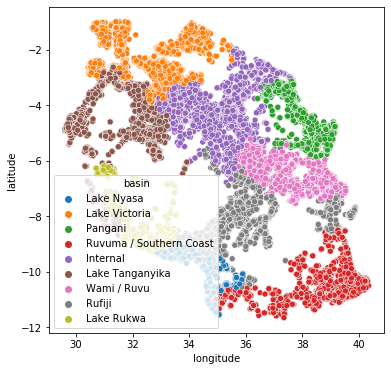

In [42]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = trainingdata, x='longitude', y='latitude', hue= 'basin')
plt.show()

In [43]:
trainingdata.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'region', 'population',
       'public_meeting', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'payment_type', 'quality_group',
       'quantity', 'source_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [44]:
#I'm doing this to get an idea for what classes are lacking and may need to be grouped together.
for col in trainingdata.columns:
    if trainingdata[col].dtype == 'object':
        print(trainingdata[col].value_counts())
    else:
        continue

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-25      1
2011-09-19      1
2004-03-06      1
2011-09-23      1
2004-06-01      1
Name: date_recorded, Length: 356, dtype: int64
Small sized funder        26992
Government Of Tanzania     9084
Medium sized funder        8113
unknown                    3582
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Name: funder, dtype: int64
Small sized installer     26616
DWE                       17402
Medium sized installer     6658
unknown                    3583
Government                 1825
RWE                        1206
Commu                      1060
DANIDA                     1050
Name: installer, dtype: int64
Lake Victoria              10248
Pangani                     8940
Rufiji                  

In [45]:
#Create new column years_since_construction that uses last year in dataset as upper limit
trainingdata['years_since_construction'] = trainingdata['construction_year'].apply(lambda x: 2013 - x)

In [46]:
#Create new column days_since_recorded that uses latest date as upper limit
trainingdata['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(trainingdata['date_recorded'])
trainingdata['days_since_recorded'] = trainingdata['days_since_recorded'].astype('timedelta64[D]').astype(int)

In [66]:
trainingdata.to_csv("scrubbed_trainingdata.csv")